**Customer Churn Trend Analysis**

   index                date InvoiceNo StockCode  \
0      0 2010-12-01 08:26:00    536365    85123A   
1      1 2010-12-01 08:26:00    536365     71053   
2      2 2010-12-01 08:26:00    536365    84406B   
3      3 2010-12-01 08:26:00    536365    84029G   
4      4 2010-12-01 08:26:00    536365    84029E   

                           Description  Quantity  UnitPrice  CustomerID  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55     17850.0   
1                  WHITE METAL LANTERN         6       3.39     17850.0   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75     17850.0   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39     17850.0   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39     17850.0   

          Country    LastPurchaseDate  
0  United Kingdom 2011-02-10 14:38:00  
1  United Kingdom 2011-02-10 14:38:00  
2  United Kingdom 2011-02-10 14:38:00  
3  United Kingdom 2011-02-10 14:38:00  
4  United Kingdom 2011-02-10 14:38:0

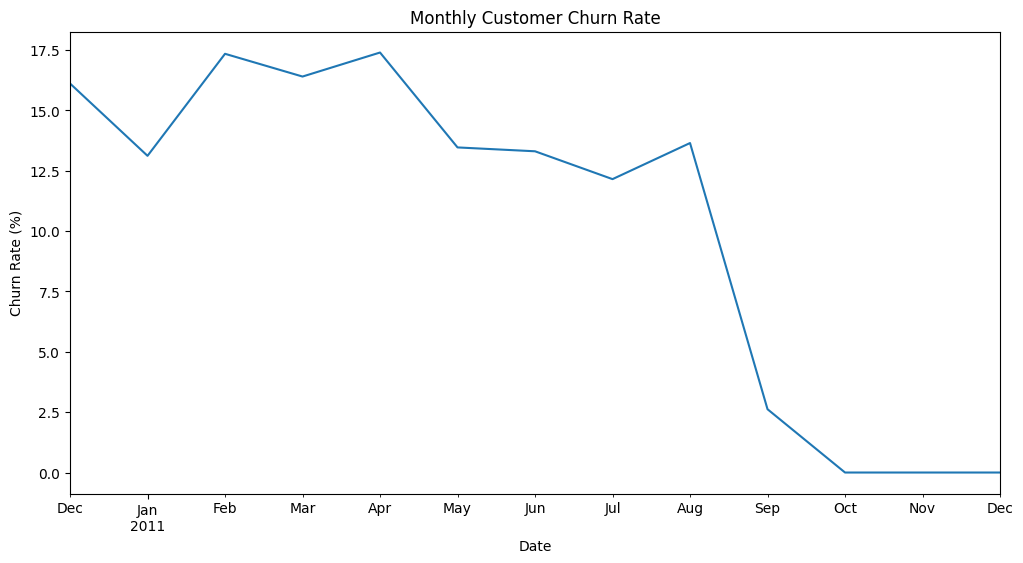

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# UCL repository URL for the Online Retail dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Load the dataset from the URL
data = pd.read_excel(url)

# Rename 'InvoiceDate' to 'date' for consistency
data.rename(columns={'InvoiceDate': 'date'}, inplace=True)

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Reset the index to bring 'date' back as a column
data = data.reset_index()

# Calculate the last purchase date for each customer
last_purchase = data.groupby('CustomerID')['date'].max().reset_index()
last_purchase.columns = ['CustomerID', 'LastPurchaseDate']

# Define a churned customer as one who has not purchased in the last 3 months
churn_period = pd.Timedelta(days=90)

# Merge with original data to get the last purchase date
data = data.reset_index()
customer_data = pd.merge(data, last_purchase, on='CustomerID', how='left')

# Display the customer data to verify the merge
print(customer_data.head())

# Calculate if the customer is churned
customer_data['Churned'] = customer_data['LastPurchaseDate'] < (customer_data['date'].max() - churn_period)

# Display the customer data to verify the churn calculation
print(customer_data.head())

# Calculate monthly churn rate
monthly_churn = customer_data.set_index('date').groupby(pd.Grouper(freq='M'))['Churned'].mean()

# Convert to percentage
monthly_churn = monthly_churn * 100

# Plot monthly churn rate
plt.figure(figsize=(12, 6))
monthly_churn.plot()
plt.title('Monthly Customer Churn Rate')
plt.xlabel('Date')
plt.ylabel('Churn Rate (%)')
plt.show()
